In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as pllt
import cv2

In [3]:
vgg=tf.keras.applications.VGG16()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
vgg.to_json

<bound method Model.to_json of <Functional name=vgg16, built=True>>

In [7]:
tf.keras.applications.vgg16.decode_predictions(np.ones((1,1000)),top=1000)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n15075141', 'toilet_tissue', 1.0),
  ('n02319095', 'sea_urchin', 1.0),
  ('n02395406', 'hog', 1.0),
  ('n02391049', 'zebra', 1.0),
  ('n02389026', 'sorrel', 1.0),
  ('n02364673', 'guinea_pig', 1.0),
  ('n02363005', 'beaver', 1.0),
  ('n02361337', 'marmot', 1.0),
  ('n02356798', 'fox_squirrel', 1.0),
  ('n02346627', 'porcupine', 1.0),
  ('n02342885', 'hamster', 1.0),
  ('n02328150', 'Angora', 1.0),
  ('n02326432', 'hare', 1.0),
  ('n02325366', 'wood_rabbit', 1.0),
  ('n02321529', 'sea_cucumber', 1.0),
  ('n02317335', 'starfish', 1.0),
  ('n02229544', 'cricket', 1.0),
  ('n02281787', 'lycaenid', 1.0),
  ('n02281406', 'sulphur_butterfly', 1.0),
  ('n02280649', 'cabbage_butterfly', 1.0),
  ('n02279972', 'monarch', 1.0),
  ('n02277742', 'ringlet', 1.0),
  ('n02276258', 'admiral', 1.0),
  ('n02268853', 'damselfly', 1.0),
  ('n02268443', 'dragonfly', 1.0),
  ('n02264363', 'lacewing', 1.0),
  ('n02259212', 'leafhopper', 1.0),
  ('n02256656', 'cicada', 1.0),
  ('n02236044', 'mantis', 1.0),


In [10]:
!wget /content/7A68FE16-3F13-40AD-A54B-C2C87194FFC8-scaled.jpeg

/content/7A68FE16-3F13-40AD-A54B-C2C87194FFC8-scaled.jpeg: Scheme missing.


In [11]:
test_image=cv2.imread("/content/7A68FE16-3F13-40AD-A54B-C2C87194FFC8-scaled.jpeg")

In [12]:
test_image=cv2.cvtColor(test_image,cv2.COLOR_BGR2RGB)

In [14]:
import matplotlib.pyplot as plt

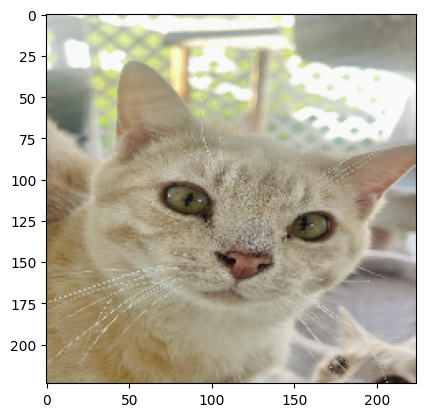

In [15]:
test_image=cv2.resize(test_image,(224,224))
plt.imshow(test_image)

In [16]:
test_image=np.expand_dims(test_image,axis=0)

In [17]:
#vgg preprocessing
image=tf.keras.applications.vgg16.preprocess_input(test_image)

In [19]:
image.shape

(1, 224, 224, 3)

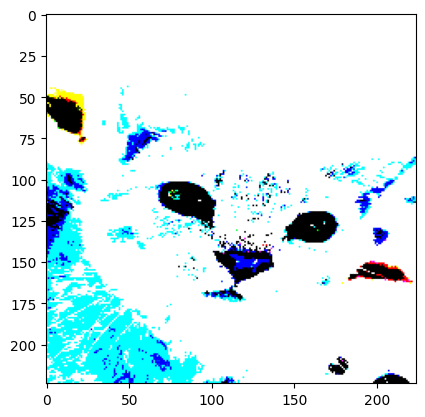

In [22]:
plt.imshow(image[0])

In [24]:
result=vgg.predict(image)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 700ms/step


array([[9.51911474e-08, 9.49917819e-07, 7.23380595e-07, 1.81828034e-06,
        1.25485276e-05, 2.57029369e-05, 2.40916802e-06, 6.82948439e-07,
        3.02313379e-06, 3.66768222e-06, 1.32719990e-07, 3.86068493e-08,
        7.70350539e-07, 4.07382316e-07, 4.85696212e-08, 3.55915603e-07,
        1.38720225e-06, 4.06204708e-06, 6.12845895e-07, 1.05910217e-07,
        4.29570918e-07, 2.22160020e-06, 1.01636189e-07, 1.00175475e-06,
        3.78804799e-07, 1.47594051e-07, 2.82587791e-07, 4.55793810e-07,
        2.03291862e-07, 5.87952286e-07, 1.63967655e-07, 2.07741778e-07,
        3.83789796e-07, 8.27809927e-08, 8.97060275e-08, 1.01302632e-07,
        2.32334699e-07, 1.05490777e-07, 8.29413329e-06, 3.01681354e-07,
        5.52687607e-06, 6.92509559e-07, 1.56849785e-06, 1.61646108e-06,
        5.42478074e-06, 4.88532521e-07, 4.09940321e-06, 1.99538545e-06,
        1.39129938e-07, 1.52963850e-07, 4.19196340e-07, 2.86776904e-05,
        2.42076158e-06, 1.27393253e-06, 9.35157277e-06, 8.892041

In [25]:
np.argmax(result)

287

In [26]:
tf.keras.applications.vgg16.decode_predictions(result)

[[('n02127052', 'lynx', 0.37419248),
  ('n02124075', 'Egyptian_cat', 0.33149183),
  ('n02123597', 'Siamese_cat', 0.19072627),
  ('n02123045', 'tabby', 0.03261526),
  ('n02123159', 'tiger_cat', 0.031107929)]]